In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Loading the dataset

In [ ]:
data = pd.read_csv('diabetes.csv', delimiter=',')
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,data.mean(axis=0))
outcome = data.iloc[:,8]
print(data)
print(data.describe().T)



     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

Try to use the softUmput from GitHub open resource but it didn't work

In [ ]:
# from soft_impute import SoftImpute
# clf = SoftImpute(J=1, lambda_=2.0)
# X_test = data.to_numpy().copy()
# fit = clf.fit(X_test)
# imputed = clf.predict(X_test)
# k = imputed[:,0]
# plt.hist(k,bins = [0,2,4,6,8,10,12,14,16]) 
# plt.title("histogram") 
# plt.show()

#Data Normalization

In [ ]:
d = preprocessing.normalize(data.iloc[:,0:8], axis=0)
scaled_df = pd.DataFrame(d, columns = features)
scaled_df = pd.concat([scaled_df, outcome], axis=1)


array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

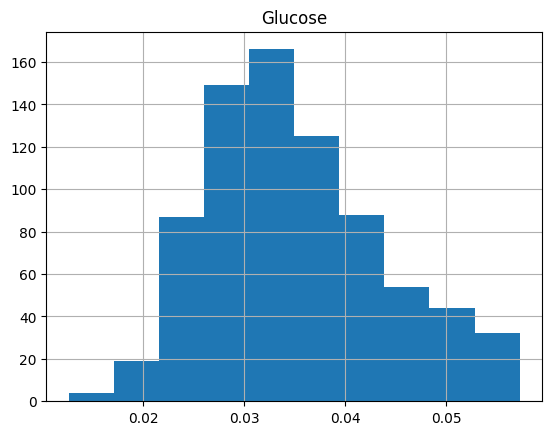

In [ ]:
scaled_df.hist(column="Glucose")

array([[<Axes: title={'center': 'BloodPressure'}>]], dtype=object)

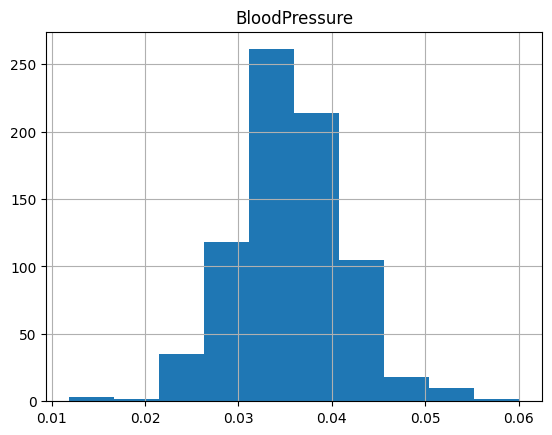

In [ ]:
scaled_df.hist(column="BloodPressure")

In [ ]:
X = scaled_df.iloc[:,0:8].to_numpy()
y = data.iloc[:,8].to_numpy()


#Split the dataset and train the model

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [ ]:
x_train_df = pd.DataFrame(x_train,columns = features)
x_test_df = pd.DataFrame(x_test,columns = features)

In [ ]:
model = Sequential()
model.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 75.79
8/8 [==============================] - 0s 2ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 1 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

In [ ]:
#test error 
_, accuracy_test_original = model.evaluate(x_test, y_test, verbose=0)
print(accuracy_test_original)

0.7705627679824829


# Class contrastive analysis: Max Max - Min Min

In [ ]:
def max_calcuation(arr):
  max = np.max(arr, axis =0)
  return max

In [ ]:
def min_calcuation(arr):
  min = np.min(arr, axis =0)
  return min

In [ ]:
def max_matrix(arr,model):
  prediction_max = []
  for i in range(len(arr)):
    row_index = 0
    X_single= np.full((28,8),arr[i])
    for m in range(8):
      for j in range(m+1,8):
       X_single[row_index][m] = max[m]
       X_single[row_index][j] = max[j]
       row_index +=1
    predictions_sub_max = model.predict(X_single).reshape((1,28))
    if len(prediction_max) == 0:
      prediction_max = predictions_sub_max
    else:
      prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
  prediction_max = prediction_max.reshape((231,28))
  return prediction_max


In [ ]:
def min_matrix(arr,model):
  prediction_min = []
  for i in range(len(arr)):
    row_index = 0
    X_single= np.full((28,8),arr[i])
    for m in range(8):
      for j in range(m+1,8):
       X_single[row_index][m] = min[m]
       X_single[row_index][j] = min[j]
       row_index +=1
    predictions_sub_min = model.predict(X_single).reshape((1,28))
    if len(prediction_min) == 0:
      prediction_min = predictions_sub_min
    else:
      prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
  prediction_min = prediction_min.reshape((231,28))
  return prediction_min

In [ ]:
testX = np.copy(x_test)
max = max_calcuation(testX)
min = min_calcuation(testX)
# MaxMax = [[0 for x in range(28)] for y in range(len(x_test))]

In [ ]:
prediction_max = max_matrix(x_test,model)
prediction_min = min_matrix(x_test,model)
result = np.subtract(prediction_max, prediction_min)
heatmap_diff = pd.DataFrame(result)

1/1 [==============================] - 0s 23ms/step


Text(83.25, 0.5, 'difference')

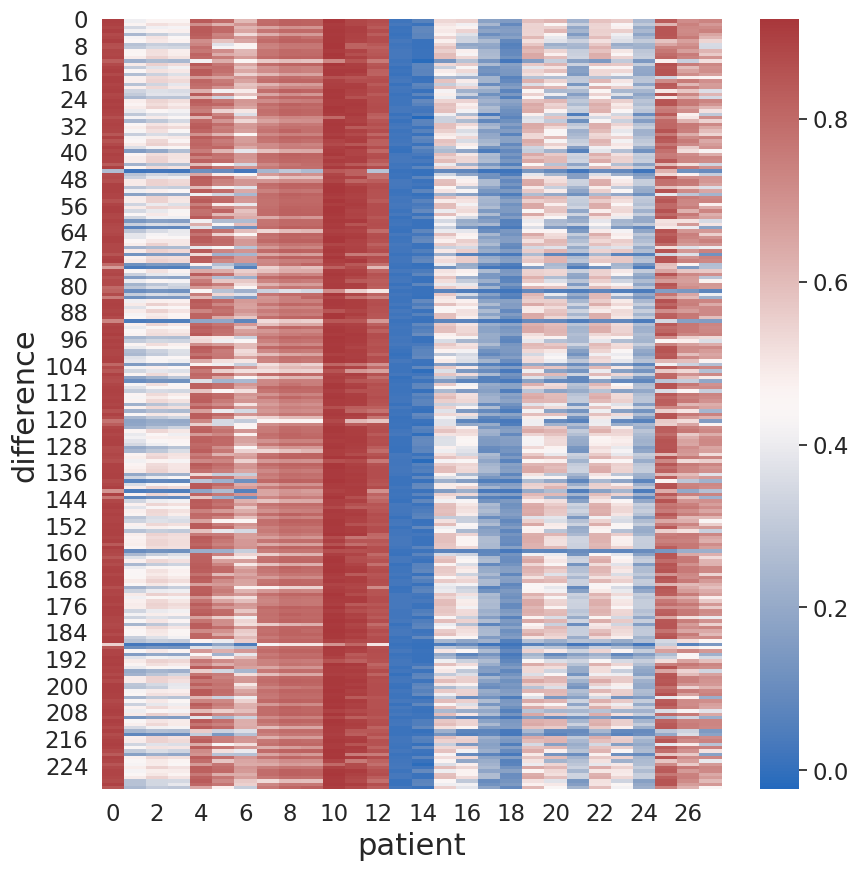

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
# ax = sns.heatmap(heatmap_diff,cmap = 'cool')
plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

##outliers detection

index -0-based:
0 column: redness -> peg & Glu
13 column : blueness -> BP & Skinthickness

everything is tend to be white \\
the outliers are blue \\

column 1: Pregnancies, BloodPressure \\
column 16: BloodPressure, DiabetesPedigreeFunction \\
column 24: Insulin, Age \\

Summary: BloodPressure, Pregnancies, DiabetesPedigreeFunction, Insulin, Age

####changed

In [ ]:
# row_num_double= heatmap_diff[(heatmap_diff.iloc[:,1] < 0.3) & (heatmap_diff.iloc[:,16] < 0.35) &(heatmap_diff.iloc[:,24] < 0.15)].index 
# print(row_num_double)

$features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]$


column 0: preg, glu

column 4: preg, bmi

column 5: preg, dpf

summary: preg[0], glu[1], bmi[5], dpf[6]


column 0: preg, glu

column 10: glu, bmi

column 11: glu, dpf

In [ ]:
row_num_double = heatmap_diff[(heatmap_diff.iloc[:,0] < 0.8)].index 
print(row_num_double)

Int64Index([45, 73, 74, 80, 83, 90, 120, 141, 143, 187], dtype='int64')


In [ ]:
# row_num_double = heatmap_diff[(heatmap_diff.iloc[:,0] < 0.8)&(heatmap_diff.iloc[:,5] < 0.5)].index 
# print(row_num_double)

In [ ]:
# row_num_double = x_test_df[(x_test_df.iloc[:,0] < 0.8)].index 

everything is red \\
the outliers are blue \\
use column 0,5,25 \\
which indicates: \\

column 0: Pregnancies, Glucose \\
column 5: Pregnancies, DiabetesPedigreeFunction \\
column 25: DiabetesPedigreeFunction, BMI \\
summary: Pregnancies, DiabetesPedigreeFunction, Glucose, BMI


In [ ]:
sort = heatmap_diff[heatmap_diff.index.isin(row_num_double)]
print(sort)

           0         1         2         3         4         5         6   \
45   0.264242  0.017836  0.026173  0.021772  0.109983  0.096951  0.025275   
73   0.797927  0.114818  0.147609  0.138291  0.472682  0.268300  0.165070   
74   0.675266  0.040178  0.057273  0.052375  0.189023  0.346365  0.058904   
80   0.798827  0.293739  0.351559  0.322647  0.678732  0.638637  0.451892   
83   0.755618  0.114196  0.145247  0.144490  0.608963  0.216322  0.153035   
90   0.732846  0.042413  0.053306  0.051047  0.190781  0.194471  0.076983   
120  0.775690  0.180936  0.208367  0.201612  0.729690  0.347337  0.306818   
141  0.693474  0.041194  0.055761  0.048714  0.186390  0.261142  0.058784   
143  0.771629  0.074593  0.103515  0.088194  0.575887  0.211337  0.108377   
187  0.549639  0.025595  0.034992  0.035575  0.081037  0.185567  0.039988   

           7         8         9   ...        18        19        20  \
45   0.240019  0.296054  0.255823  ...  0.014810  0.137967  0.093625   
73   0.7

Find the original test data of outlieres

In [ ]:
filter = pd.DataFrame(x_test[heatmap_diff.index.isin(row_num_double)],columns = features)
print(filter)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      0.00000  0.051785       0.038418       0.080347  0.003351  0.064619   
1      0.00706  0.049484       0.033493       0.062492  0.138570  0.046125   
2      0.02118  0.049771       0.040388       0.061216  0.111287  0.041774   
3      0.00706  0.034523       0.039403       0.061216  0.047865  0.042318   
4      0.00000  0.047470       0.044328       0.042086  0.162742  0.056895   
5      0.04236  0.052648       0.046298       0.026191  0.019098  0.044384   
6      0.07766  0.038839       0.034037       0.026191  0.019098  0.056895   
7      0.00000  0.051785       0.032507       0.049738  0.019098  0.045690   
8      0.00000  0.046607       0.037433       0.071419  0.023933  0.057874   
9      0.02824  0.056676       0.034478       0.049738  0.178059  0.039924   

   DiabetesPedigreeFunction       Age  
0                  0.151484  0.025586  
1                  0.043943  0.028657  
2                  0.


summary: preg[0], glu[1], bmi[5], dpf[6]

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

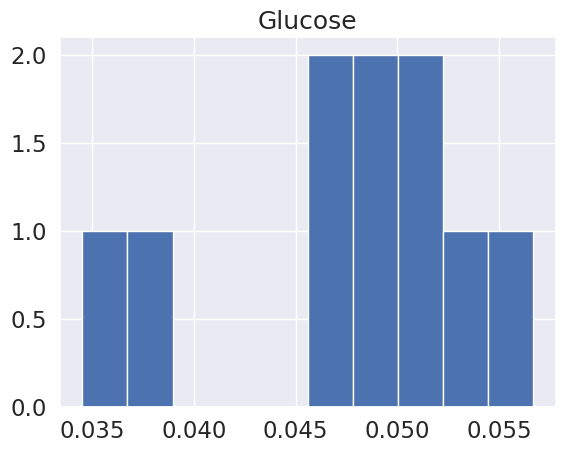

In [ ]:
filter.hist(column="Glucose")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

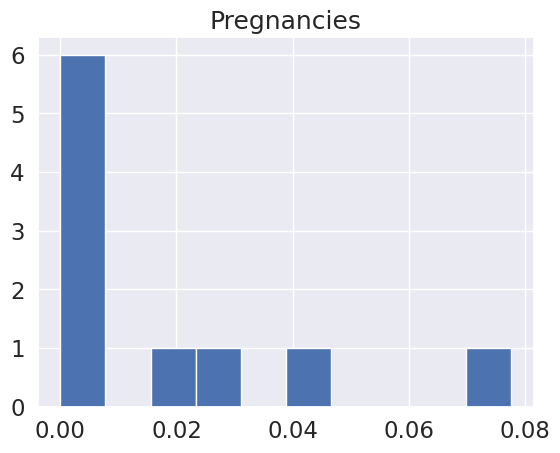

In [ ]:
filter.hist(column="Pregnancies")

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

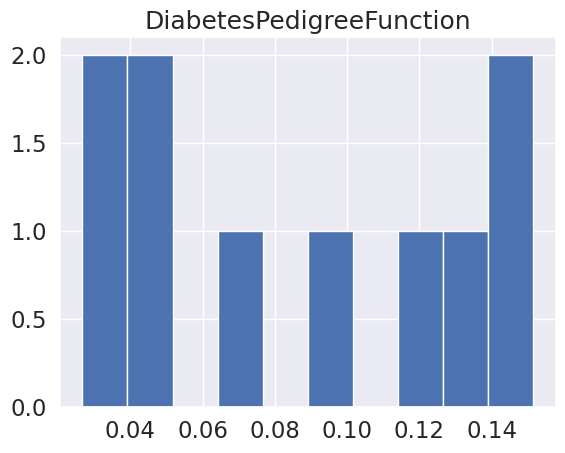

In [ ]:
filter.hist(column="DiabetesPedigreeFunction")

In [ ]:
import statsmodels.stats.api as sms
interval = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean(), axis=0)
print(interval)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.000193  0.043198       0.034743       0.040245  0.023758  0.043510   
1     0.036519  0.052720       0.041413       0.065882  0.120862  0.055789   

   DiabetesPedigreeFunction       Age  
0                  0.052548  0.025577  
1                  0.121071  0.037468  


In [ ]:
import statsmodels.stats.api as sms
confid = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]


In [ ]:
print(low_bd)
print(high_bd)

[0.0001932  0.04319806 0.03474324 0.04024463 0.02375818 0.04351035
 0.05254758 0.02557659]
[0.03651857 0.05271972 0.04141338 0.06588241 0.12086234 0.05578904
 0.12107097 0.03746841]


features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"] 

Summary: BloodPressure, Pregnancies, DiabetesPedigreeFunction, Insulin, Age


array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

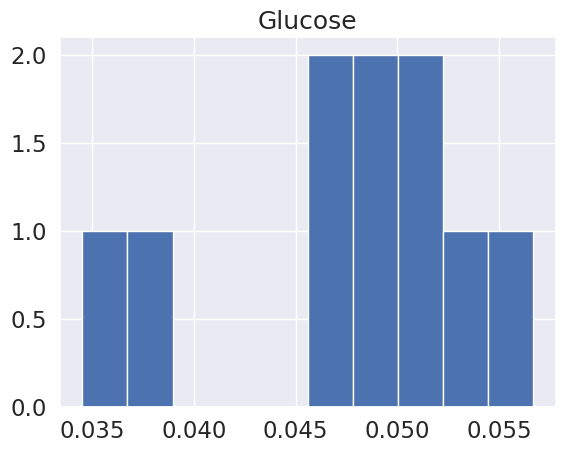

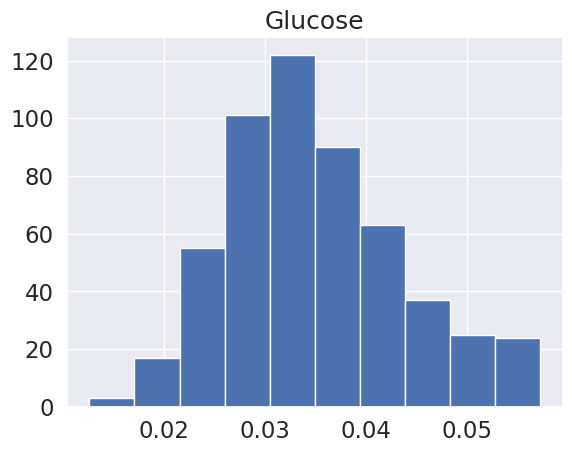

In [ ]:
filter.hist(column="Glucose")
x_train_df.hist(column="Glucose")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

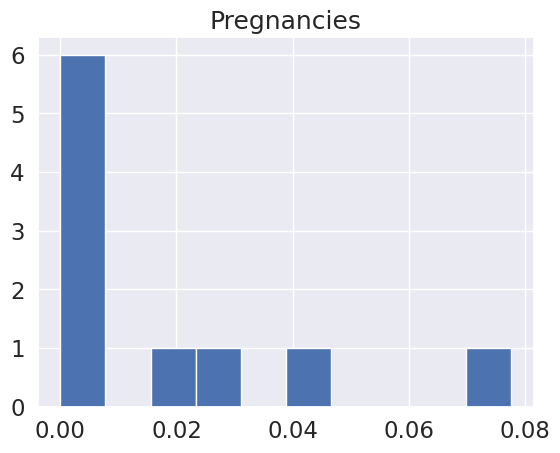

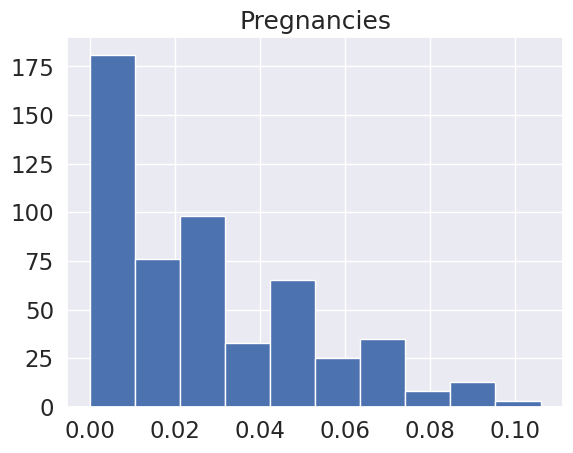

In [ ]:
filter.hist(column="Pregnancies")
x_train_df.hist(column="Pregnancies")

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

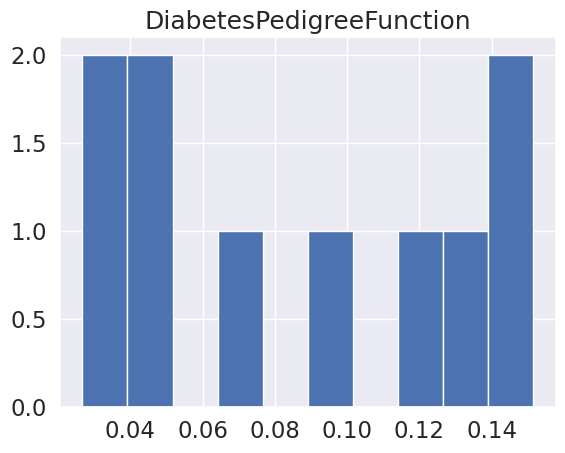

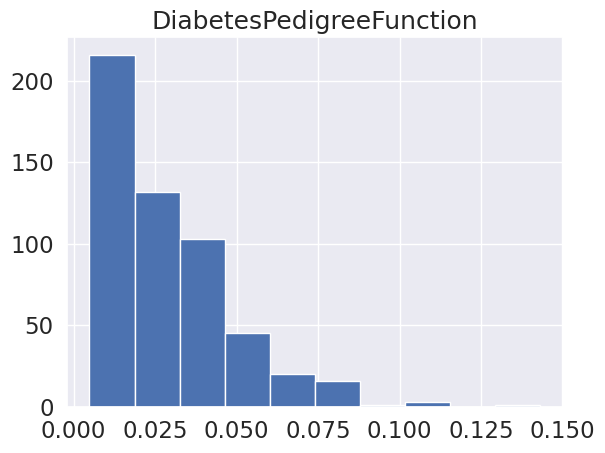

In [ ]:

filter.hist(column="DiabetesPedigreeFunction")
x_train_df.hist(column="DiabetesPedigreeFunction")

####changed!

summary: preg[0], glu[1], bmi[5], dpf[6]

In [ ]:
# train_ref = x_train_df[((x_train_df.iloc[:,0] < high_bd[0]) & (x_train_df.iloc[:,0] > low_bd[0]))  & (x_train_df.iloc[:,1] < high_bd[1]) & (x_train_df.iloc[:,1] > low_bd[1])  & (x_train_df.iloc[:,6] < high_bd[6]) & (x_train_df.iloc[:,6] > low_bd[6])].index 

train_ref = x_train_df[(x_train_df.iloc[:,1] > high_bd[1]) | (x_train_df.iloc[:,1] < low_bd[1]) | (x_train_df.iloc[:,0] > high_bd[0]) | (x_train_df.iloc[:,0] < low_bd[0])].index 

select = train_ref.values
print(len(select))

504


In [ ]:
train_clean_data = x_train_df[~x_train_df.index.isin(train_ref)]
print(train_clean_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
16       0.02118  0.050059       0.028567       0.028058  0.046429  0.035790   
41       0.02118  0.049771       0.038418       0.049738  0.044276  0.036769   
48       0.00706  0.052073       0.031522       0.038260  0.043079  0.037096   
78       0.00706  0.045168       0.035463       0.026782  0.040207  0.027849   
88       0.02118  0.052361       0.036448       0.026191  0.019098  0.033180   
102      0.02118  0.045456       0.031522       0.016579  0.092620  0.033941   
107      0.03530  0.045456       0.041373       0.052289  0.050259  0.042861   
154      0.00706  0.048045       0.036448       0.021681  0.034463  0.025456   
161      0.03530  0.045456       0.034478       0.026191  0.019098  0.032418   
179      0.00706  0.043442       0.029552       0.026191  0.019098  0.028393   
219      0.02118  0.050634       0.042358       0.034434  0.037335  0.036226   
223      0.02824  0.045456       0.03841

In [ ]:
y_train_df = pd.DataFrame(y_train)
print(y_train_df)

     0
0    0
1    0
2    1
3    0
4    1
..  ..
532  0
533  1
534  0
535  1
536  1

[537 rows x 1 columns]


In [ ]:
y_train_clean_data = y_train_df[~y_train_df.index.isin(train_ref)]

In [ ]:
print(y_train_clean_data)

     0
16   1
41   1
48   1
78   0
88   1
102  0
107  1
154  1
161  0
179  0
219  1
223  1
267  0
283  1
293  1
321  1
325  0
371  1
380  0
392  1
396  1
397  1
410  1
412  1
419  0
461  1
463  1
464  1
471  1
474  1
477  1
499  1
501  0


#Train new model

In [ ]:
model_clean = Sequential()

model_clean.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model_clean.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model_clean.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))


model_clean.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_clean.fit(train_clean_data, y_train_clean_data, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model_clean.evaluate(train_clean_data, y_train_clean_data, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model_clean.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 72.73
8/8 [==============================] - 0s 2ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 1 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 1 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 1 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 1 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

In [ ]:
#test error 
_, accuracy_test = model_clean.evaluate(x_test, y_test, verbose=0)
print(accuracy_test)

0.3073593080043793


array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

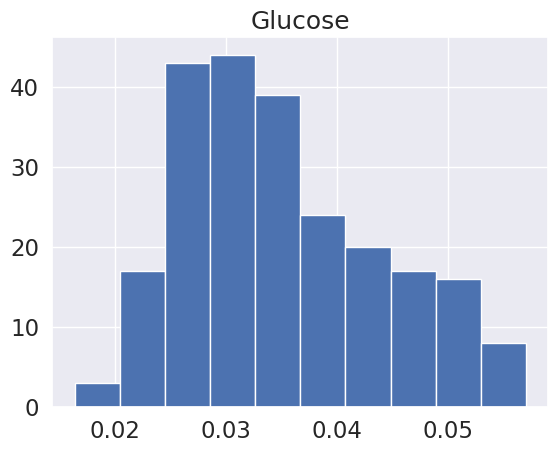

In [ ]:
x_test_df.hist(column="Glucose")

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

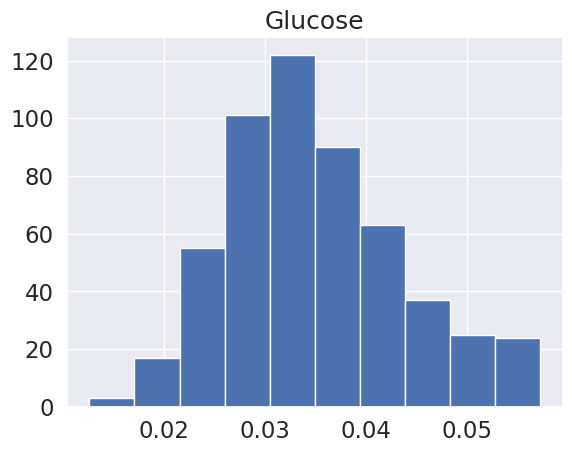

In [ ]:
x_train_df.hist(column="Glucose")

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

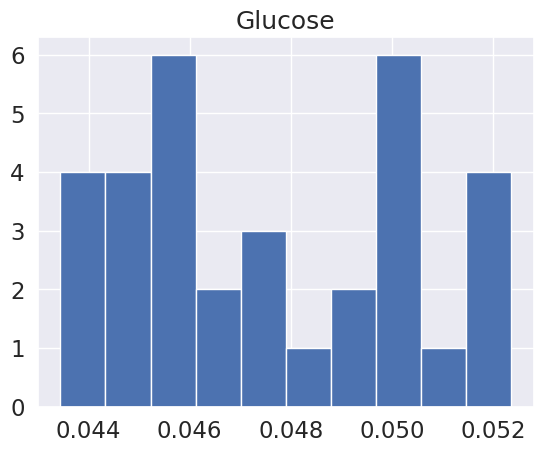

In [ ]:
train_clean_data.hist(column="Glucose")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

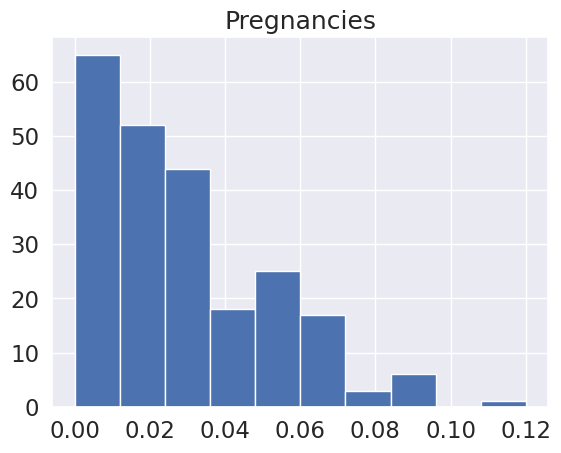

In [ ]:
x_test_df.hist(column="Pregnancies")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

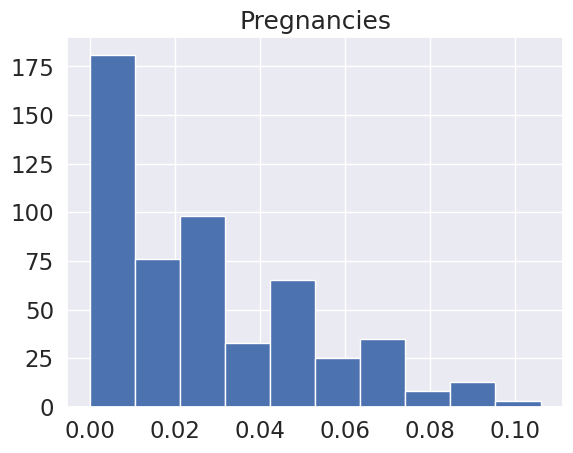

In [ ]:
x_train_df.hist(column="Pregnancies")

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

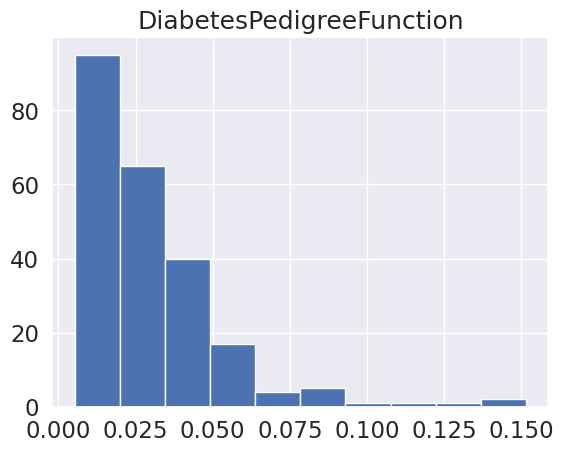

In [ ]:
x_test_df.hist(column="DiabetesPedigreeFunction")

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

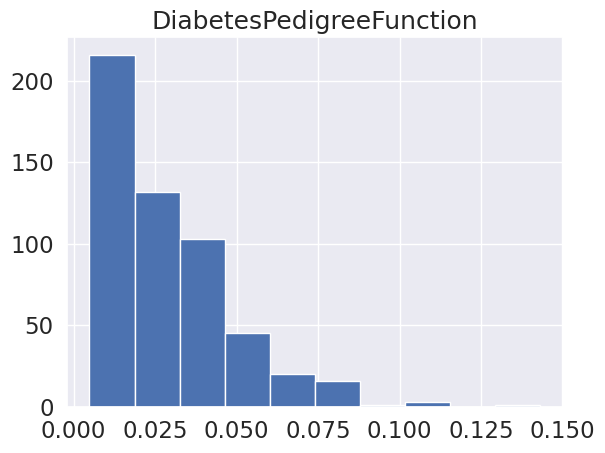

In [ ]:
x_train_df.hist(column="DiabetesPedigreeFunction")

In [ ]:
# MaxMax_cleaned = [[0 for x in range(28)] for y in range(len(x_test))]

In [ ]:
prediction_max_clean = []
for i in range(len(x_test)):
    row_index = 0
    X_single= np.full((28,8),x_test[i])
    for m in range(8):
      for j in range(m+1,8):
       X_single[row_index][m] = max[m]
       X_single[row_index][j] = max[j]
       row_index +=1
    predictions_sub_max = model_clean.predict(X_single).reshape((1,28))
    if len(prediction_max_clean) == 0:
      prediction_max_clean = predictions_sub_max
    else:
      prediction_max_clean = np.concatenate((prediction_max_clean, predictions_sub_max), axis=1)
prediction_max_clean = prediction_max_clean.reshape((231,28))

1/1 [==============================] - 0s 22ms/step


In [ ]:
prediction_min_clean = []
for i in range(len(x_test)):
    row_index = 0
    X_single= np.full((28,8),x_test[i])
    for m in range(8):
      for j in range(m+1,8):
       X_single[row_index][m] = min[m]
       X_single[row_index][j] = min[j]
       row_index +=1
    predictions_sub_min = model_clean.predict(X_single).reshape((1,28))
    if len(prediction_min_clean) == 0:
      prediction_min_clean = predictions_sub_min
    else:
      prediction_min_clean = np.concatenate((prediction_min_clean, predictions_sub_min), axis=1)
prediction_min_clean = prediction_min_clean.reshape((231,28))

1/1 [==============================] - 0s 23ms/step


In [ ]:
# prediction_max_clean = max_matrix(x_test,model_clean)
# prediction_min_clean = min_matrix(x_test,model_clean)
result_clean = np.subtract(prediction_max_clean, prediction_min_clean)
heatmap_diff_clean = pd.DataFrame(result_clean)

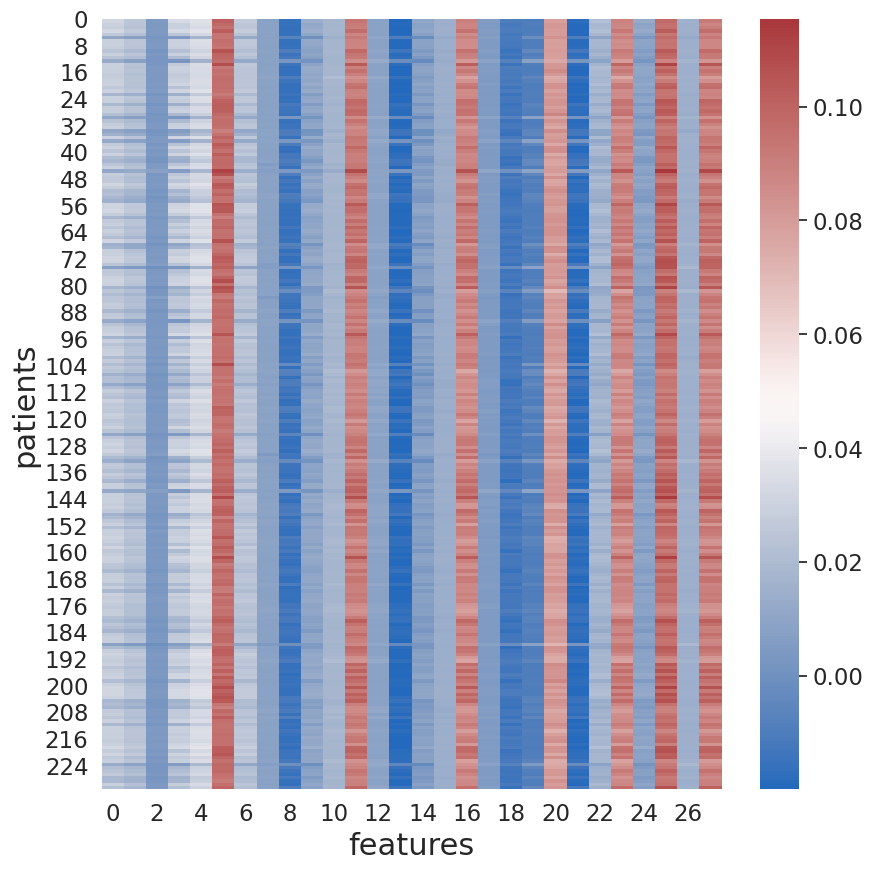

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff_clean,cmap = sns.color_palette("vlag", as_cmap=True))
# ax = sns.heatmap(heatmap_diff,cmap = 'cool')
plt.xlabel('features',fontsize=22)
plt.ylabel('patients',fontsize=22)
plt.savefig('opposite_2d_heatmap.eps', format='eps')

In [ ]:
print(heatmap_diff.iloc[[45]])
print(heatmap_diff_clean.iloc[[45]])

          0         1         2         3         4         5         6   \
45  0.264242  0.017836  0.026173  0.021772  0.109983  0.096951  0.025275   

          7         8         9   ...       18        19        20        21  \
45  0.240019  0.296054  0.255823  ...  0.01481  0.137967  0.093625  0.023025   

         22        23        24        25        26        27  
45  0.09862  0.085588  0.019248  0.622944  0.116381  0.098451  

[1 rows x 28 columns]
          0         1         2         3         4        5         6   \
45  0.011549  0.011803  0.007568  0.005836  0.018235  0.11126  0.014045   

          7         8         9   ...        18        19       20        21  \
45  0.006559  0.004015  0.004167  ...  0.000478  0.009311  0.08061  0.005756   

          22        23        24        25        26        27  
45  0.011146  0.104171  0.008408  0.115373  0.016397  0.109158  

[1 rows x 28 columns]


####changed

In [ ]:
# row_num_double = heatmap_diff[(heatmap_diff.iloc[:,0] < 0.8)&(heatmap_diff.iloc[:,5] < 0.5)].index 

In [ ]:
check_row_num_double= heatmap_diff_clean[(heatmap_diff_clean.iloc[:,0] < 0.8)].index 

In [ ]:
print(check_row_num_double.values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230]


In [ ]:
print(row_num_double)

Int64Index([45, 73, 74, 80, 83, 90, 120, 141, 143, 187], dtype='int64')
